# Simple Auto Encoders

In [21]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [22]:
encoding_dim = 15 
input_img = Input(shape=(784,))

# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)

# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [3]:
# This model shows encoded images
encoder = Model(input_img, encoded)

# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))

# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 21s 2us/step
(60000, 784)
(10000, 784)


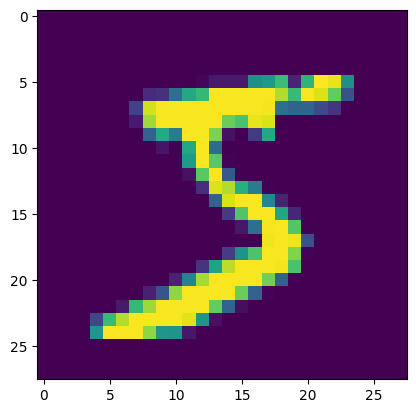

In [6]:
plt.imshow(x_train[0].reshape(28,28))

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 6s 4ms/step - loss: 0.3152 - val_loss: 0.2303
Epoch 2/15
235/235 [==============================] - 1s 3ms/step - loss: 0.2043 - val_loss: 0.1849
Epoch 3/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1759 - val_loss: 0.1652
Epoch 4/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1605 - val_loss: 0.1541
Epoch 5/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1522 - val_loss: 0.1481
Epoch 6/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1478 - val_loss: 0.1449
Epoch 7/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1451 - val_loss: 0.1426
Epoch 8/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1431 - val_loss: 0.1409
Epoch 9/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1414 - val_loss: 0.1391
Epoch 10/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1399 - val_loss: 0.1377

313/313 [==============================] - 0s 692us/step


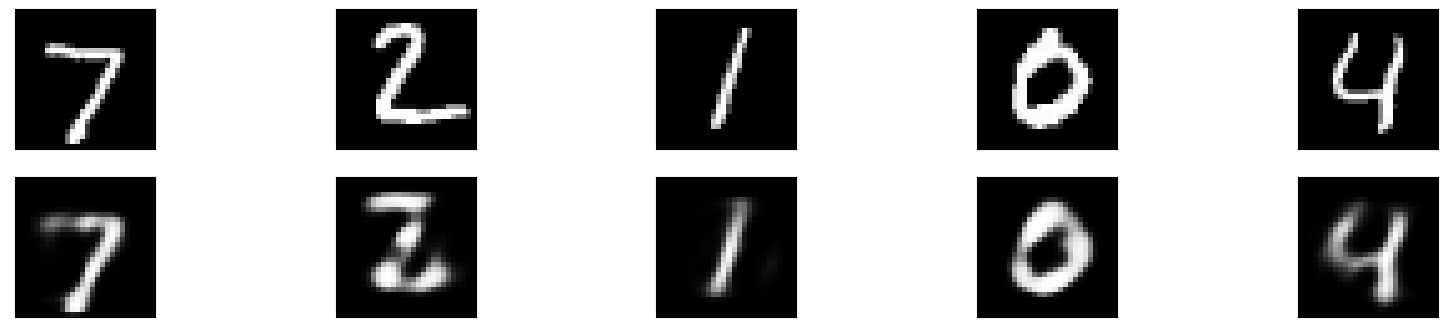

In [8]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep CNN Auto Encoders

In [11]:
from keras.layers import Dense
from keras.models import Sequential

In [12]:
model = Sequential()

# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)       0

In [14]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
model.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 11s 9ms/step - loss: 0.1304 - val_loss: 0.0811
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0787 - val_loss: 0.0758
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0754 - val_loss: 0.0736
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0736 - val_loss: 0.0721
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0723 - val_loss: 0.0711
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0714 - val_loss: 0.0703
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0706 - val_loss: 0.0700
Epoch 8/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0700 - val_loss: 0.0691
Epoch 9/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0695 - val_loss: 0.0688
Epoch 10/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0691 - val_loss: 0.068

313/313 [==============================] - 1s 2ms/step


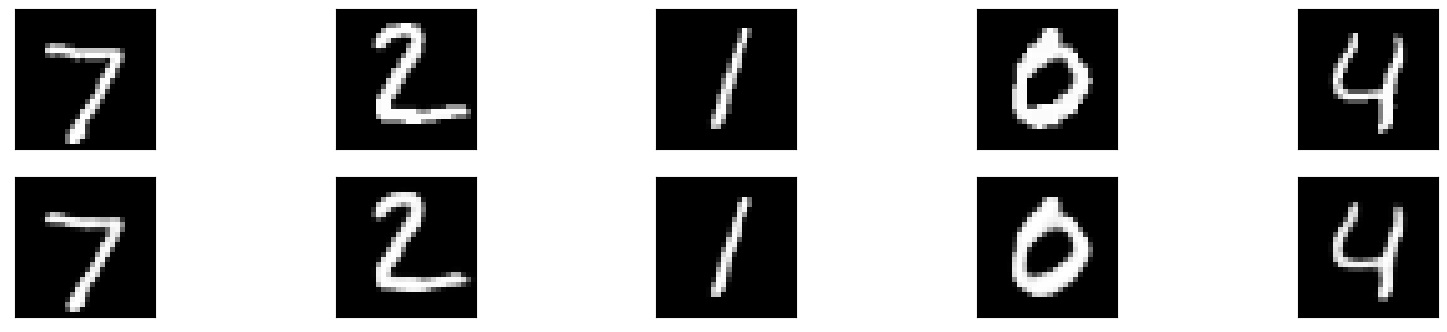

In [15]:
pred = model.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Denoising Auto Encoders

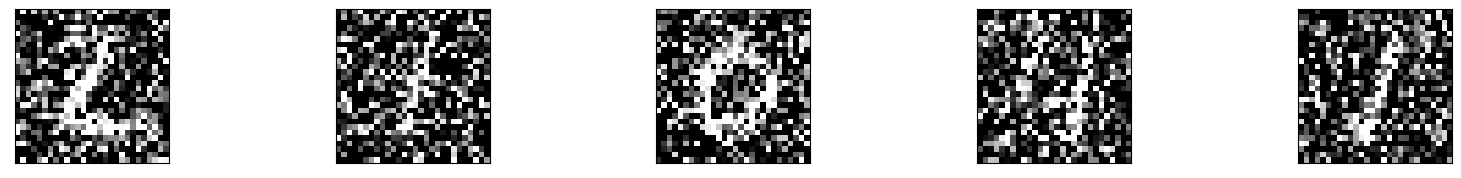

In [17]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Here is how the noisy images look right now.
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
model = Sequential()
# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 6s 11ms/step - loss: 0.1882 - val_loss: 0.1447
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.1411 - val_loss: 0.1375
Epoch 3/15
469/469 [==============================] - 5s 10ms/step - loss: 0.1354 - val_loss: 0.1321
Epoch 4/15
469/469 [==============================] - 5s 11ms/step - loss: 0.1321 - val_loss: 0.1300
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.1299 - val_loss: 0.1283
Epoch 6/15
469/469 [==============================] - 5s 10ms/step - loss: 0.1282 - val_loss: 0.1279
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.1270 - val_loss: 0.1254
Epoch 8/15
469/469 [==============================] - 5s 10ms/step - loss: 0.1258 - val_loss: 0.1242
Epoch 9/15
469/469 [==============================] - 5s 10ms/step - loss: 0.1250 - val_loss: 0.1234
Epoch 10/15
469/469 [==============================] - 5s 10ms/step - loss: 0.1241 - val_lo

313/313 [==============================] - 1s 2ms/step


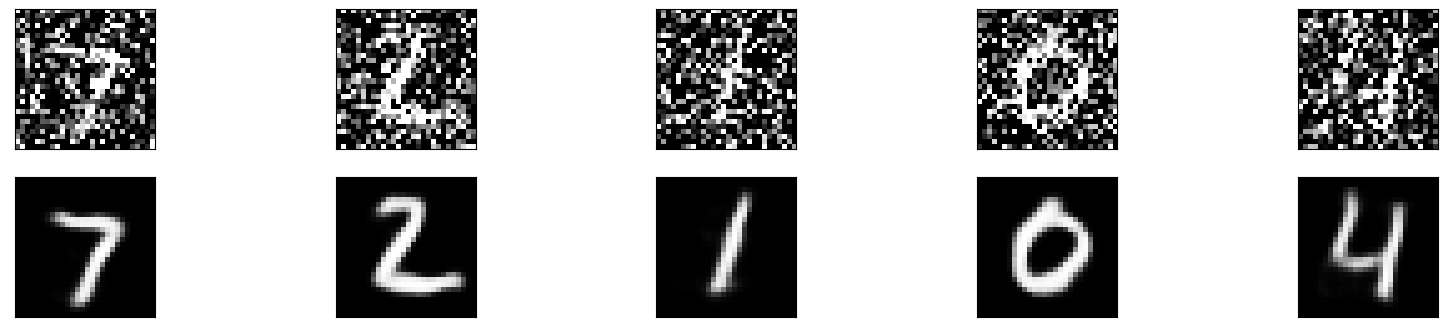

In [20]:
pred = model.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()